# 2D Histograms in physt

In [1]:
# Necessary import evil
import physt
from physt import h1, h2, histogramdd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

/home/pipek/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Some data
x = np.random.normal(100, 1, 1000)
y = np.random.normal(10, 10, 1000)

In [3]:
# Create a simple histogram
histogram = h2(x, y, [8, 4], name="Some histogram", axis_names=["x", "y"])
histogram

Histogram2D(bins=(8, 4), total=1000.0)

In [4]:
# Frequencies are a 2D-array
histogram.frequencies

array([[   1.,    3.,    0.,    2.],
       [   3.,   19.,   22.,    5.],
       [  11.,   83.,   77.,    7.],
       [  26.,  174.,  142.,   23.],
       [  21.,  131.,   89.,   23.],
       [   8.,   54.,   49.,    5.],
       [   0.,    9.,    9.,    1.],
       [   0.,    1.,    2.,    0.]])

## Multidimensional binning

In most cases, binning methods that apply for 1D histograms, can be used also in higher dimensions. In such cases, each parameter can be either scalar (applies to all dimensions) or a list/tuple with independent values for each dimension. This also applies for *range* that has to be list/tuple of tuples.

[array([  96.,   98.,  100.,  102.,  104.]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.])]

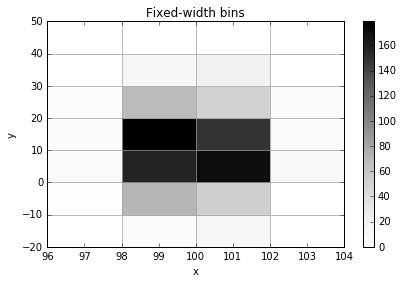

In [5]:
histogram = h2(x, y, "fixed_width", (2, 10), name="Fixed-width bins", axis_names=["x", "y"])
histogram.plot();
histogram.numpy_bins

[array([  96.56844823,   99.54366891,  100.40481735,  103.85785983]),
 array([-18.57874388,   3.29603745,  10.11174108,  17.13910722,  40.98420905])]

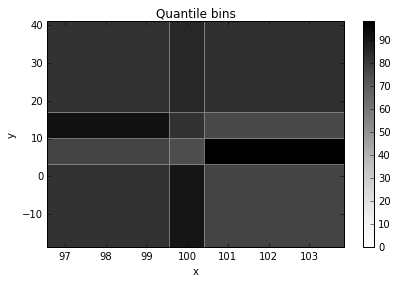

In [6]:
histogram = h2(x, y, "quantile", (3, 4), name="Quantile bins", axis_names=["x", "y"])
histogram.plot(cmap_min=0);
histogram.numpy_bins

[array([  96.,   98.,  100.,  102.,  104.]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.])]

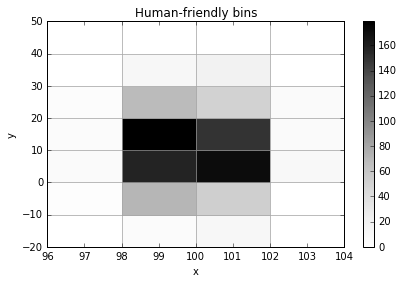

In [7]:
histogram = h2(x, y, "human", 5, name="Human-friendly bins", axis_names=["x", "y"])
histogram.plot();
histogram.numpy_bins

## Plotting

### 2D

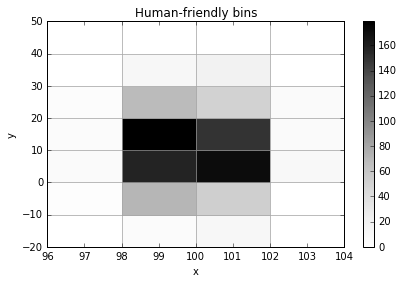

In [8]:
# Default is workable
ax = histogram.plot()

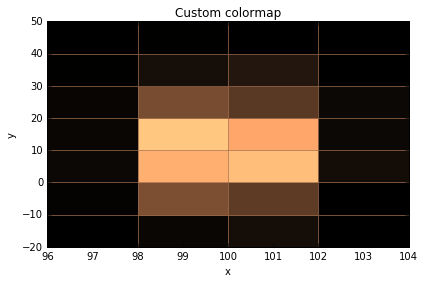

In [9]:
# Custom colormap, no colorbar
import matplotlib.cm as cm
fig, ax = plt.subplots()
ax = histogram.plot(ax=ax, cmap=cm.copper, show_colorbar=False, grid_color=cm.copper(0.5))
ax.set_title("Custom colormap");

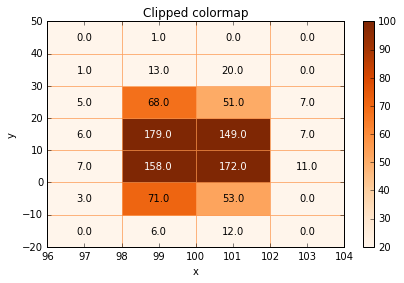

In [10]:
# Use a named colormap + limit it to a range of values
import matplotlib.cm as cm
fig, ax = plt.subplots()
ax = histogram.plot(ax=ax, cmap="Oranges", show_colorbar=True, cmap_min=20, cmap_max=100, show_values=True)
ax.set_title("Clipped colormap");

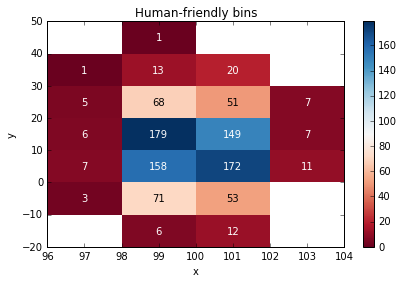

In [11]:
# Show labels (and hide zero bins), no grid(lw=0)
ax = histogram.plot(show_values=True, show_zero=False, cmap=cm.RdBu, format_value=int, lw=0)

## 3D

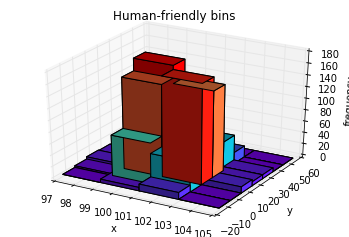

In [12]:
histogram.plot("bar3d", cmap="rainbow");

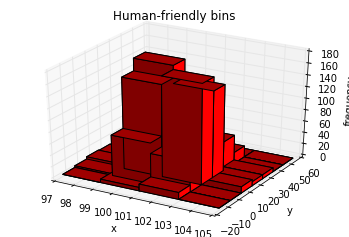

In [13]:
histogram.plot("bar3d", color="red");

## Projections

Histogram1D(bins=4, total=1000.0)

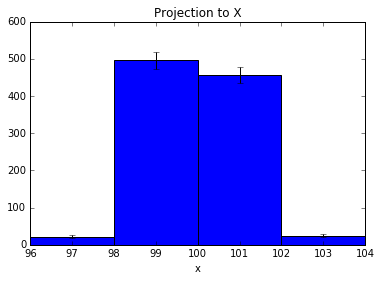

In [14]:
proj1 = histogram.projection("x", name="Projection to X")
proj1.plot(errors=True)
proj1

Histogram1D(bins=7, total=1000.0)

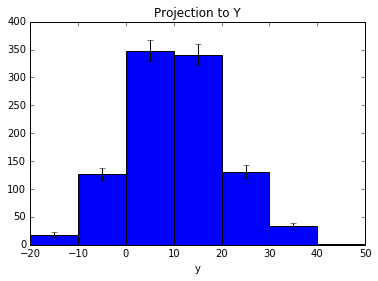

In [15]:
proj2 = histogram.projection("y", name="Projection to Y")
proj2.plot(errors=True)
proj2

## N-dimensional histograms

Although is not easy to visualize them, it is possible to create histograms of any dimensions that behave similar to 2D ones. Warning: be aware that the memory consumption can be significant.

In [16]:
# Create a 4D histogram
data = [np.random.rand(1000)[:, np.newaxis] for i in range(4)]
data = np.concatenate(data, axis=1)
h4 = histogramdd(data, [3, 2, 2, 3], axis_names="abcd")
h4

HistogramND(bins=(3, 2, 2, 3), total=1000.0)

In [17]:
h4.frequencies

array([[[[ 27.,  28.,  31.],
         [ 30.,  28.,  27.]],

        [[ 23.,  18.,  24.],
         [ 27.,  16.,  27.]]],


       [[[ 24.,  29.,  33.],
         [ 30.,  29.,  33.]],

        [[ 25.,  25.,  38.],
         [ 40.,  26.,  30.]]],


       [[[ 24.,  36.,  31.],
         [ 32.,  23.,  28.]],

        [[ 26.,  22.,  34.],
         [ 24.,  24.,  28.]]]])

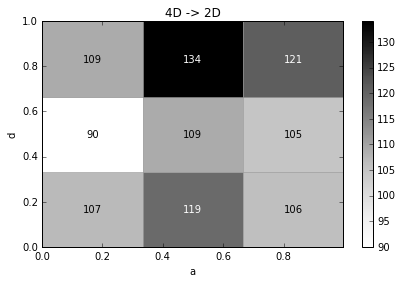

In [18]:
h4.projection("a", "d", name="4D -> 2D").plot(show_values=True, format_value=int, cmap_min="min");

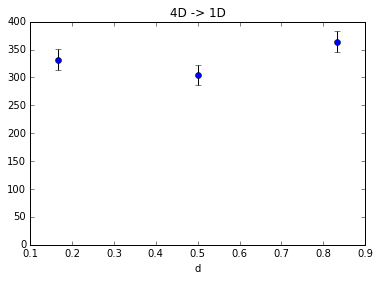

In [19]:
h4.projection("d", name="4D -> 1D").plot("scatter", errors=True);

## Support for pandas DataFrames (without pandas dependency ;-))

In [20]:
# Load notorious example data set
iris = sns.load_dataset('iris')

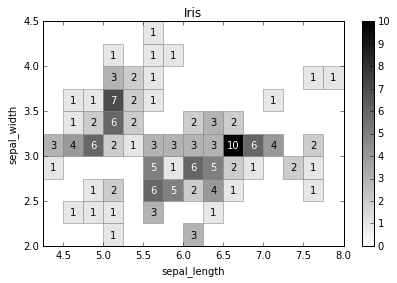

In [21]:
iris = sns.load_dataset('iris')
iris_hist = physt.h2(iris["sepal_length"], iris["sepal_width"], "human", (12, 7), name="Iris")
iris_hist.plot(show_zero=False, cmap=cm.gray_r, show_values=True, format_value=int);

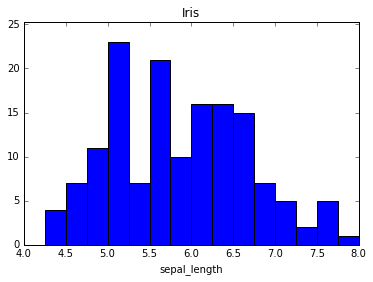

In [22]:
iris_hist.projection("sepal_length").plot();